In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from analysis.dataset.june_dataset import JuNEDataset
from analysis.metrics.metrics_transtions import TransitionMetrics


In [2]:
path = Path("../data/all_data_06_09_2023_with_res.csv")
df_hack = pd.read_csv(path, index_col=0)
df_hack.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,expert,cell_label,task,execution_time,execution_start,result,interruptions,src_len,execution_time_sec,next_action_time
0,1113,2023-05-06 11:58:35.270,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,e139884774504ae997d7e38e6be6da88,0.0,code,# # Do not forget to check if your notebook lo...,...,False,"helper_functions,",task1,0 days 00:00:22.731000,2023-05-06 11:58:35.270,stream,0,162.0,22.731,22.731
1,1114,2023-05-06 11:58:58.001,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,finished_execute,e139884774504ae997d7e38e6be6da88,0.0,code,# # Do not forget to check if your notebook lo...,...,False,"helper_functions,",task1,NaN,NaN,NaN,0,162.0,NaN,4.652
2,1116,2023-05-06 11:59:02.653,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,a47800e62cbe40c1ad4003b2879f5f03,1.0,code,!pip install pandas\n,...,False,"helper_functions,",task1,0 days 00:00:00.822000,2023-05-06 11:59:02.653,stream,0,20.0,0.822,0.822
3,1117,2023-05-06 11:59:03.475,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,finished_execute,a47800e62cbe40c1ad4003b2879f5f03,2.0,code,!pip install pandas\n,...,False,"helper_functions,",task1,NaN,NaN,NaN,0,20.0,NaN,1.788
4,1118,2023-05-06 11:59:05.263,7215278a-b19d-477e-82df-9a03bb979fb6,0033f76c-6179-4fb4-a9ce-79112a52b51c,task1.ipynb,execute,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,code,!pip install sklearn,...,False,"helper_functions,",task1,0 days 00:00:00.755000,2023-05-06 11:59:05.263,stream,0,20.0,0.755,0.755


In [3]:
df_hack.loc[df_hack.result == "display_data", 'cell_label'] = 'result_visualization,'
mask = df_hack.cell_source.fillna("").str.contains('|'.join(['read_csv', 'read_pickle']))
df_hack.loc[mask, 'cell_label'] = 'load_data,'


In [4]:
june = JuNEDataset(df_hack)
june.prepare_dataset()
june.df.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,expert,cell_label,task,execution_time,execution_start,result,interruptions,src_len,execution_time_sec,next_action_time
14726,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,False,"helper_functions,",task1,0 days 00:00:00.337000,2023-05-06 10:32:55.892,stream,0,86.0,0.337,0.337
14727,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,False,"helper_functions,",task1,None,None,None,0,86.0,None,1.819
14728,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,False,"helper_functions,",task1,0 days 00:00:00.381000,2023-05-06 10:32:58.048,stream,0,86.0,0.381,0.381
14729,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,False,"helper_functions,",task1,None,None,None,0,86.0,None,2.834
14730,5,2023-05-06 10:33:01.263,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,False,"helper_functions,",task1,0 days 00:00:00.002000,2023-05-06 10:33:23.898,None,0,86.0,0.002,4.99


In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = june.df.cell_label.fillna("").apply(lambda x: x.split(",")[:-1])

mlb = MultiLabelBinarizer()

onehot_labels = pd.DataFrame(
    mlb.fit_transform(labels),
    columns=mlb.classes_,
    index=labels.index
)
onehot_labels.head()


,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
14726,0,0,0,0,1,0,0,0,0,0
14727,0,0,0,0,1,0,0,0,0,0
14728,0,0,0,0,1,0,0,0,0,0
14729,0,0,0,0,1,0,0,0,0,0
14730,0,0,0,0,1,0,0,0,0,0


In [6]:
df_with_onehot = pd.concat([june.df, onehot_labels], axis=1)
df_with_onehot.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
14726,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
14727,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
14728,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
14729,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0
14730,5,2023-05-06 10:33:01.263,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,0,1,0,0,0,0,0


In [7]:
### steps in a data science notebook life cycle
labels = [
    'comment_only', 'helper_functions', 'load_data', 'data_exploration',
    'data_preprocessing', 'result_visualization', 'save_results', 'modelling', 'evaluation',
    'prediction'
]
label_count_per_cell = df_with_onehot[labels].sum(axis=1).values


In [8]:
df_with_single_label = df_with_onehot[label_count_per_cell == 1]
df_with_single_label.shape


(17355, 32)

In [9]:
df_with_single_label['label'] = df_with_single_label.cell_label.fillna("").apply(
    lambda x: x.strip().split(',')[0]
)
df_with_single_label.head()


/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_6971/2687794275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_single_label['label'] = df_with_single_label.cell_label.fillna("").apply(


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results,label
14726,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14727,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14728,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14729,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14730,5,2023-05-06 10:33:01.263,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions


In [10]:
df_with_single_label

,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,...,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results,label
14726,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14727,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14728,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14729,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
14730,5,2023-05-06 10:33:01.263,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,...,0,0,0,1,0,0,0,0,0,helper_functions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11220,23611,2023-08-18 17:58:16.425,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,finished_execute,351dbffd267149b18870f078fff8b438,33.0,code,list(df['action_time']),...,1,0,0,0,0,0,0,0,0,data_exploration
11225,23616,2023-08-18 18:00:52.300,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,execute,aa46744a5169409ab0eaef0df6319217,34.0,code,for i in range(len(list(array_of_dates))):\n ...,...,1,0,0,0,0,0,0,0,0,data_exploration
11226,23617,2023-08-18 18:00:52.629,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,finished_execute,aa46744a5169409ab0eaef0df6319217,35.0,code,for i in range(len(list(array_of_dates))):\n ...,...,1,0,0,0,0,0,0,0,0,data_exploration
11229,23620,2023-08-18 18:01:45.019,9889103b-e51e-418f-b890-ab42ef266bc5,789ccc53-ffd3-48ba-9135-13fc8c1ce0c0,task1.ipynb,execute,aa46744a5169409ab0eaef0df6319217,34.0,code,for i in range(len(list(array_of_dates))):\n ...,...,1,0,0,0,0,0,0,0,0,data_exploration


In [11]:
df_with_single_label.shape

(17355, 33)

In [12]:
processor = TransitionMetrics()
all_transitions = processor.calculate_metrics(df_with_single_label)
all_transitions.head()


100%|██████████| 31/31 [00:00<00:00, 3396.91it/s]


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,changes,type,event_from,event_to
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN


In [13]:
execution_transitions = all_transitions[all_transitions.type == "execution_transition"]
execution_transitions.shape


(7591, 14)

In [14]:
all_transitions_merged = execution_transitions.merge(
    june.df[['task', 'kernel_id', 'expert']].drop_duplicates(subset=['task', 'kernel_id'], keep='last'),
    on='kernel_id'
)
all_transitions_merged.head()


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,changes,type,event_from,event_to,task,expert
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,helper_functions,helper_functions,False,[],execution_transition,NaN,NaN,task1,False


In [15]:
grouped_transitions = all_transitions_merged.groupby(['cell_label_from']) \
    .cell_label_to.value_counts().reset_index().rename({"count": "transitions_count"}, axis=1)

grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

grouped_transitions.head()


,cell_label_from,cell_label_to,transitions_count,probability
0,comment_only,comment_only,409,0.053880
1,comment_only,data_exploration,233,0.030694
2,comment_only,data_preprocessing,231,0.030431
3,comment_only,helper_functions,111,0.014623
4,comment_only,modelling,39,0.005138


In [16]:
transitions_matrix = grouped_transitions.pivot(
    index='cell_label_from', columns='cell_label_to', values='probability'
).fillna(0)
transitions_matrix


cell_label_to,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
cell_label_from,,,,,,,,,,
comment_only,0.053880,0.030694,0.030431,0.000395,0.014623,0.003425,0.005138,0.001449,0.001844,0.000132
data_exploration,0.027269,0.187986,0.047293,0.000132,0.023185,0.005138,0.003952,0.001054,0.011066,0.000790
data_preprocessing,0.033856,0.046107,0.153208,0.000000,0.015281,0.004611,0.004874,0.000395,0.002108,0.000000
evaluation,0.000132,0.000132,0.000132,0.000527,0.000790,0.000000,0.000132,0.000132,0.000000,0.000000
helper_functions,0.009880,0.020155,0.011856,0.000395,0.067448,0.014623,0.003293,0.003162,0.002635,0.000000
load_data,0.008168,0.008826,0.009617,0.000000,0.003425,0.017652,0.000000,0.000132,0.000132,0.000000
modelling,0.003030,0.001449,0.002898,0.000395,0.001844,0.001581,0.023976,0.011593,0.000790,0.000132
prediction,0.004611,0.002108,0.003293,0.000263,0.001581,0.000263,0.005138,0.007772,0.000132,0.000000
result_visualization,0.001449,0.011461,0.002108,0.000000,0.002108,0.000132,0.001054,0.000000,0.014227,0.000000


In [17]:
import matplotlib as mpl
import numpy as np


def plot_transitions_matrix(matrix, fig_ax=None):
    if fig_ax is None:
        fig, ax = plt.subplots(figsize=(12, 9))
    else:
        fig, ax = fig_ax

    full_matrix = pd.DataFrame(columns=labels, index=labels)
    full_matrix.loc[labels, labels] = matrix
    full_matrix = full_matrix.fillna(-1)
    mask = np.where(full_matrix == -1, True, False)


    cmap = sns.color_palette("Blues", as_cmap=True)
    cmap.set_bad(color='grey', alpha=0.1)

    ax = sns.heatmap(
        full_matrix.fillna(-1).round(3),
        annot=True,
        fmt="", cmap=cmap, mask=mask,
        linewidths=1,
        square=True, robust=True, ax=ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    )
    return fig, ax


In [18]:
task, expert = 'task2', True
grouped_transitions = all_transitions_merged\
    .groupby(['task', 'expert']).get_group((task, expert))\
    .groupby(['cell_label_from']).cell_label_to.value_counts()\
    .reset_index().rename({"count": "transitions_count"}, axis=1)

grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

transitions_matrix = grouped_transitions.pivot(
    index='cell_label_from', columns='cell_label_to', values='probability'
).fillna(0)
transitions_matrix


cell_label_to,comment_only,data_exploration,data_preprocessing,evaluation,helper_functions,load_data,modelling,prediction,result_visualization,save_results
cell_label_from,,,,,,,,,,
comment_only,0.048132,0.037365,0.028499,0.001900,0.022799,0.002533,0.019633,0.005066,0.000633,0.000633
data_exploration,0.024699,0.105763,0.019633,0.000633,0.027866,0.003167,0.015833,0.000633,0.011400,0.000633
data_preprocessing,0.029766,0.013933,0.062698,0.000000,0.032299,0.000633,0.014566,0.001267,0.000000,0.000000
evaluation,0.000633,0.000633,0.000633,0.002533,0.003800,0.000000,0.000633,0.000633,0.000000,0.000000
helper_functions,0.018366,0.033566,0.013933,0.001900,0.056998,0.011400,0.010766,0.014566,0.001900,0.000000
load_data,0.011400,0.000633,0.002533,0.000000,0.006966,0.000633,0.000000,0.000000,0.000000,0.000000
modelling,0.011400,0.002533,0.010766,0.001900,0.003167,0.003167,0.063331,0.051298,0.001900,0.000000
prediction,0.020266,0.006966,0.015199,0.001267,0.005700,0.000000,0.022799,0.027232,0.000000,0.000000
result_visualization,0.002533,0.008866,0.001267,0.000000,0.001900,0.000000,0.001267,0.000000,0.006966,0.000000


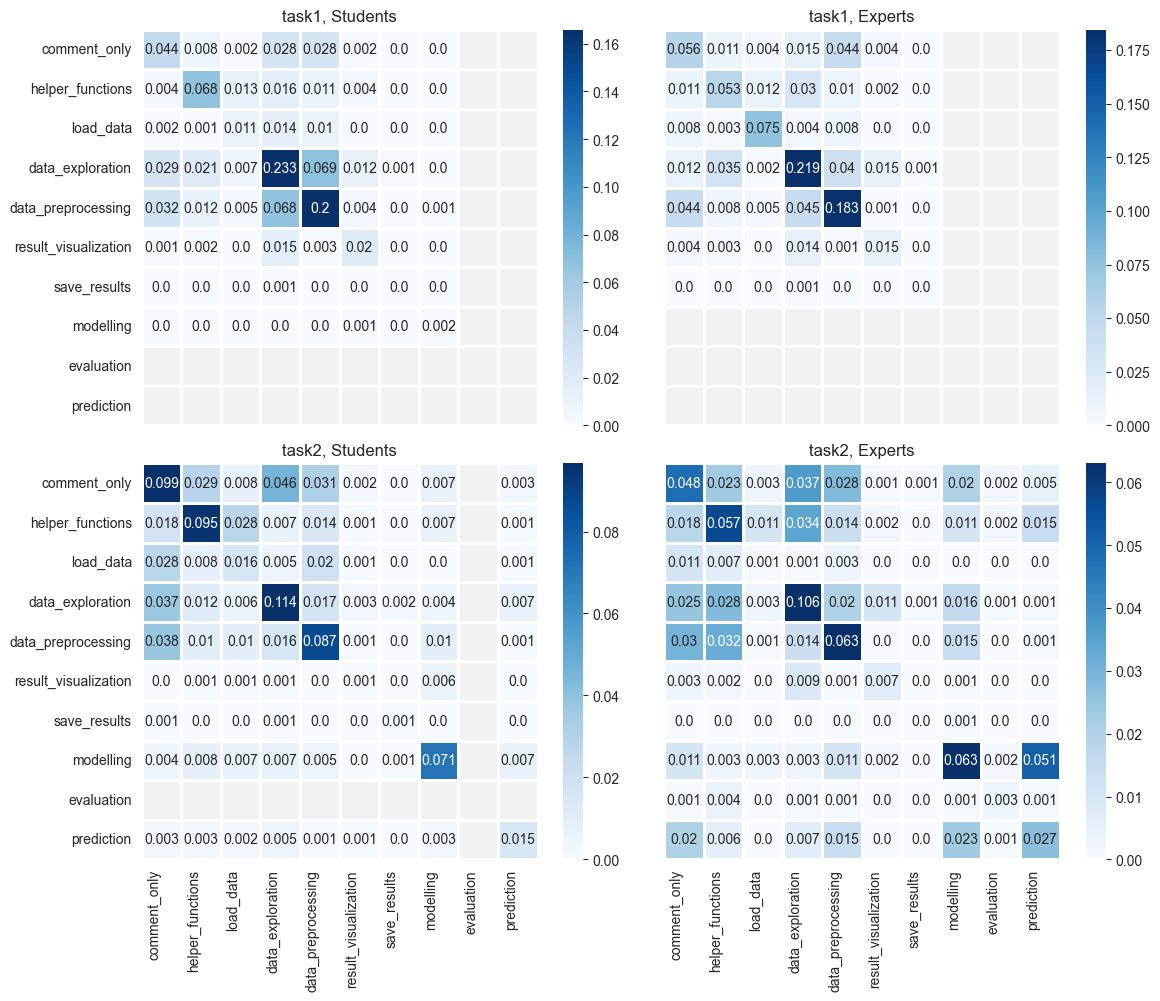

In [22]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig_all, ax_all = plt.subplots(2, 2, figsize=(12, 10))

for i, task in enumerate(['task1', 'task2']):
    for j, expert in enumerate([False, True]):
        grouped_transitions = all_transitions_merged\
            .groupby(['task', 'expert']).get_group((task, expert))\
            .groupby(['cell_label_from']).cell_label_to.value_counts()\
            .reset_index().rename({"count": "transitions_count"}, axis=1)

        grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

        transitions_matrix = grouped_transitions.pivot(
            index='cell_label_from', columns='cell_label_to', values='probability'
        ).fillna(0)
        ax_all[i][j].set_title(f"{task}, {'Experts' if expert else 'Students'}")
        fig_all, ax_all[i][j] = plot_transitions_matrix(transitions_matrix, (fig_all, ax_all[i][j]))

ax_all[0, 0].set_xticks([])
ax_all[0, 1].set_xticks([])
ax_all[0, 1].set_yticks([])
ax_all[1, 1].set_yticks([])
plt.tight_layout()

plt.savefig(f'figures/transitions/transitions_matrix_new.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [23]:
transitions_matrix.sum().sum()


1.0

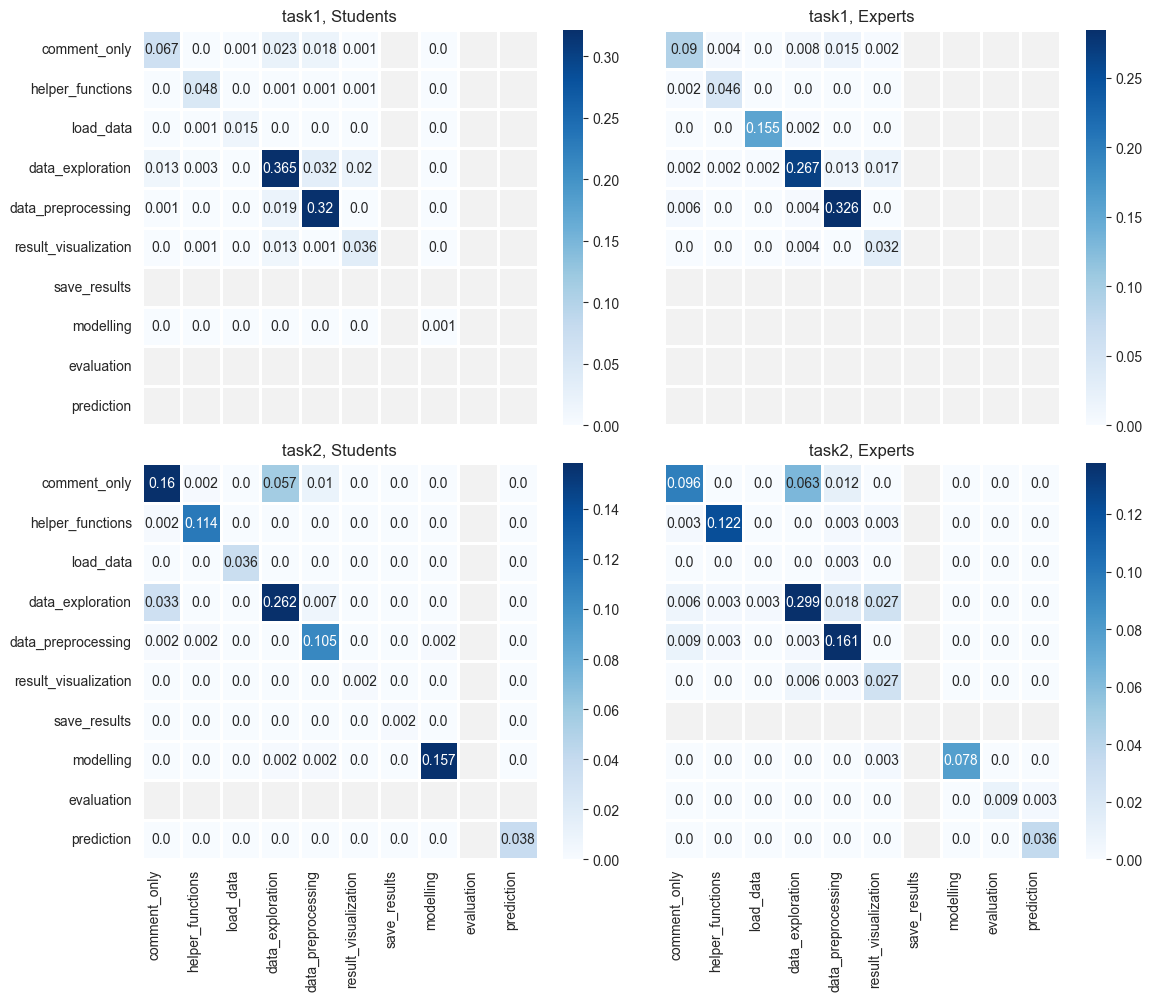

In [24]:
fig_all, ax_all = plt.subplots(2, 2, figsize=(12, 10))

for i, task in enumerate(['task1', 'task2']):
    for j, expert in enumerate([False, True]):
        grouped_transitions = all_transitions_merged.groupby("inner_transition").get_group(True)\
            .groupby(['task', 'expert']).get_group((task, expert))\
            .groupby(['cell_label_from']).cell_label_to.value_counts()\
            .reset_index().rename({"count": "transitions_count"}, axis=1)

        grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

        transitions_matrix = grouped_transitions.pivot(
            index='cell_label_from', columns='cell_label_to', values='probability'
        ).fillna(0)
        ax_all[i][j].set_title(f"{task}, {'Experts' if expert else 'Students'}")
        fig_all, ax_all[i][j] = plot_transitions_matrix(transitions_matrix, (fig_all, ax_all[i][j]))

ax_all[0, 0].set_xticks([])
ax_all[0, 1].set_xticks([])
ax_all[0, 1].set_yticks([])
ax_all[1, 1].set_yticks([])

plt.tight_layout()

plt.savefig(f'figures/transitions/inner_transitions_matrix_new.pdf', dpi=300, bbox_inches='tight')

plt.show()